<a href="https://colab.research.google.com/github/Gowshiksaravanan/AI_ML/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
from sklearn.datasets import fetch_california_housing
data=fetch_california_housing(as_frame=True)
df=data.frame

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.info()
df.describe()
df.isnull().sum()
df.rename(columns={"MedHouseVal" : "Target"}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


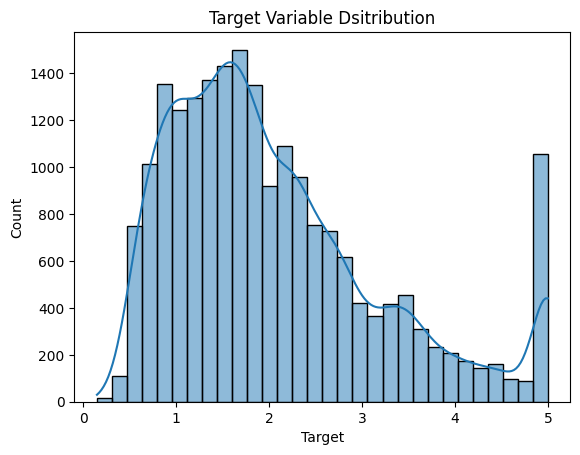

In [ ]:
sns.histplot(df["Target"], bins=30, kde=True)
plt.title("Target Variable Dsitribution")
plt.show()

In [ ]:
X=df.drop("Target", axis=1)
Y=df["Target"]
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
coeff=pd.DataFrame({"Features": X.columns, "Co-efficient":lr.coef_})
print("Intercept: ", lr.intercept_)
coeff

Intercept:  -37.02327770606409


,Features,Co-efficient
0,MedInc,0.448675
1,HouseAge,0.009724
2,AveRooms,-0.123323
3,AveBedrms,0.783145
4,Population,-0.000002
5,AveOccup,-0.003526
6,Latitude,-0.419792
7,Longitude,-0.433708


In [ ]:
y_pred=lr.predict(x_test)

print("Mean squared error : ", mean_squared_error(y_test, y_pred))
print("Mean absolute error : ", mean_absolute_error(y_test, y_pred))
print("R2 Score : ", r2_score(y_test, y_pred))

Mean squared error :  0.5558915986952444
Mean absolute error :  0.5332001304956553
R2 Score :  0.5757877060324508


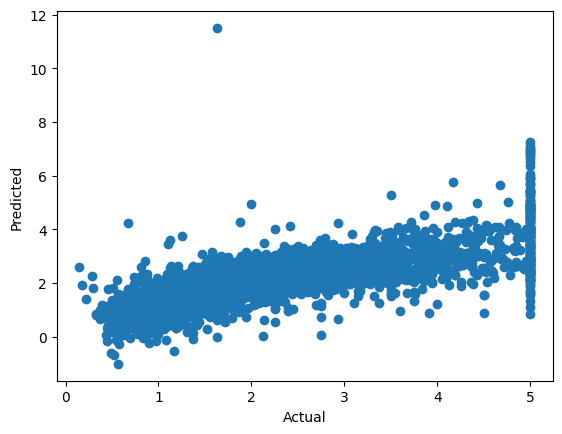

<function matplotlib.pyplot.show(close=None, block=None)>

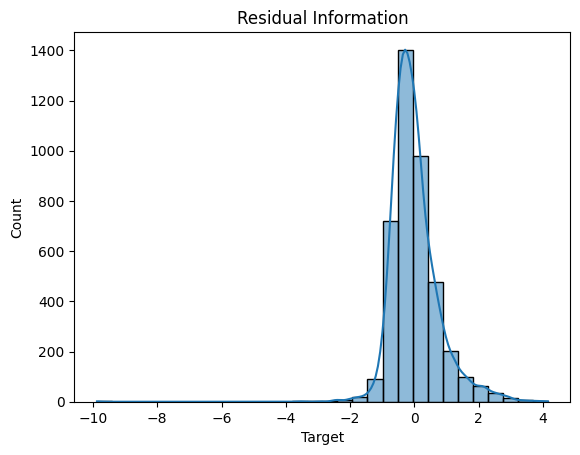

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

residuals=y_test-y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Information")
plt.show

In [ ]:
from statsmodels.api import OLS, add_constant
x_sm=add_constant(X)
model=OLS(Y, x_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Tue, 08 Jul 2025   Prob (F-statistic):               0.00
Time:                        21:03:31   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.000     -38.233     -35.650
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""